In [16]:
import os
Path =  ".//CODE//data//"
SubPath1 =  ".//CODE//data//train"
SubPath2 =  ".//CODE//data//test"
print(os.path.isdir(Path))
print(os.path.isdir(SubPath1))
print(os.path.isdir(SubPath2))

True
True
True


In [19]:
import pandas as pd
import numpy as np
# matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
vgg19 = tf.keras.applications.vgg19
#vgg = vgg19.VGG19(weights='imagenet')
vgg = vgg19.VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3))
model = tf.keras.models.Sequential([
    vgg,
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3,activation = "softmax")   #Adding the Output Layer
])
for layer in vgg.layers:
    layer.trainable = False
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1605696   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 21,630,275
Trainable params: 1,605,891
Non-trainable params: 20,024,384
_________________________________________________________________


In [21]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [22]:
bs=30         #Setting batch size
train_dir = SubPath1   #Setting training directory
test_dir = SubPath2   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,validation_split=0.2)
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(224,224),subset='training')
validation_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(224,224),subset='validation')


Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [23]:
import time
# starting time
start = time.time()

trainedmodel = model.fit_generator(train_generator,
                            steps_per_epoch = train_generator.samples // bs,
                            validation_data = validation_generator, 
                            validation_steps = validation_generator.samples // bs,
                            epochs = 20)
# end time
end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")

C:\Users\Kim-Ngoc\AppData\Local\Temp\ipykernel_4580\1716554780.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trainedmodel = model.fit_generator(train_generator,


Epoch 1/20
137/137 [==============================] - 41s 287ms/step - loss: 0.5121 - acc: 0.8480 - val_loss: 0.1668 - val_acc: 0.9569
Epoch 2/20
137/137 [==============================] - 42s 309ms/step - loss: 0.1761 - acc: 0.9398 - val_loss: 0.1349 - val_acc: 0.9588
Epoch 3/20
137/137 [==============================] - 41s 297ms/step - loss: 0.1505 - acc: 0.9430 - val_loss: 0.1463 - val_acc: 0.9549
Epoch 4/20
137/137 [==============================] - 42s 307ms/step - loss: 0.1200 - acc: 0.9513 - val_loss: 0.1189 - val_acc: 0.9608
Epoch 5/20
137/137 [==============================] - 42s 308ms/step - loss: 0.1114 - acc: 0.9574 - val_loss: 0.1137 - val_acc: 0.9627
Epoch 6/20
137/137 [==============================] - 41s 300ms/step - loss: 0.0873 - acc: 0.9719 - val_loss: 0.1191 - val_acc: 0.9647
Epoch 7/20
137/137 [==============================] - 38s 276ms/step - loss: 0.0783 - acc: 0.9716 - val_loss: 0.1356 - val_acc: 0.9598
Epoch 8/20
137/137 [==============================] - 3

In [25]:
# train 14mins
model.save('transfer_model_ex1.h5')
new_model = tf.keras.models.load_model('transfer_model_ex1.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1605696   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 21,630,275
Trainable params: 1,605,891
Non-trainable params: 20,024,384
_________________________________________________________________


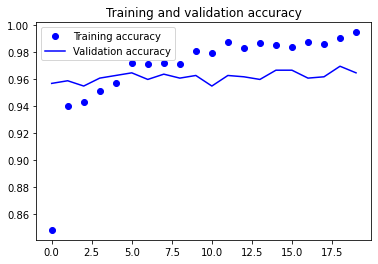

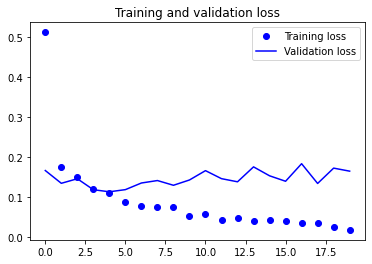

In [26]:
accuracy = trainedmodel.history['acc']
val_accuracy = trainedmodel.history['val_acc']
loss = trainedmodel.history['loss']
val_loss = trainedmodel.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [27]:
test_dir = SubPath2   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
test_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_generator=test_datagen.flow_from_directory(test_dir,class_mode='categorical',target_size=(224,224),shuffle=False)
test_generator.labels
#test_eval = model.evaluate(test_generator, test_generator.labels, verbose=1)
predicted_classes = model.predict(test_generator)
predicted_classes1 = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes1==test_generator.labels)[0]
correct
acc_test=len(correct)/len(test_generator.labels)
print(acc_test)
print(predicted_classes1)
print(test_generator.labels)
# 1

Found 1288 images belonging to 3 classes.
0.9448757763975155
[2 0 0 ... 2 2 2]
[0 0 0 ... 2 2 2]
